In [1]:
%matplotlib inline

In [17]:
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [4]:
cubes = iris.load('download.nc')

In [5]:
print(cubes)

0: 2 metre temperature / (K)           (time: 1; latitude: 721; longitude: 1440)
1: 10 metre V wind component / (m s**-1) (time: 1; latitude: 721; longitude: 1440)
2: 10 metre U wind component / (m s**-1) (time: 1; latitude: 721; longitude: 1440)
3: air_pressure_at_mean_sea_level / (Pa) (time: 1; latitude: 721; longitude: 1440)


In [49]:
print(cubes[2].var_name)

u10


In [76]:
mslp = iris.load_cube('20131101.nc', 'air_pressure_at_mean_sea_level')
mslp_atl = mslp.intersection(longitude=(-90, 10))
print(mslp_atl)

air_pressure_at_mean_sea_level / (Pa) (time: 1; latitude: 721; longitude: 401)
     Dimension coordinates:
          time                             x            -               -
          latitude                         -            x               -
          longitude                        -            -               x
     Attributes:
          Conventions: CF-1.6
          history: 2019-04-18 20:21:52 GMT by grib_to_netcdf-2.10.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf...


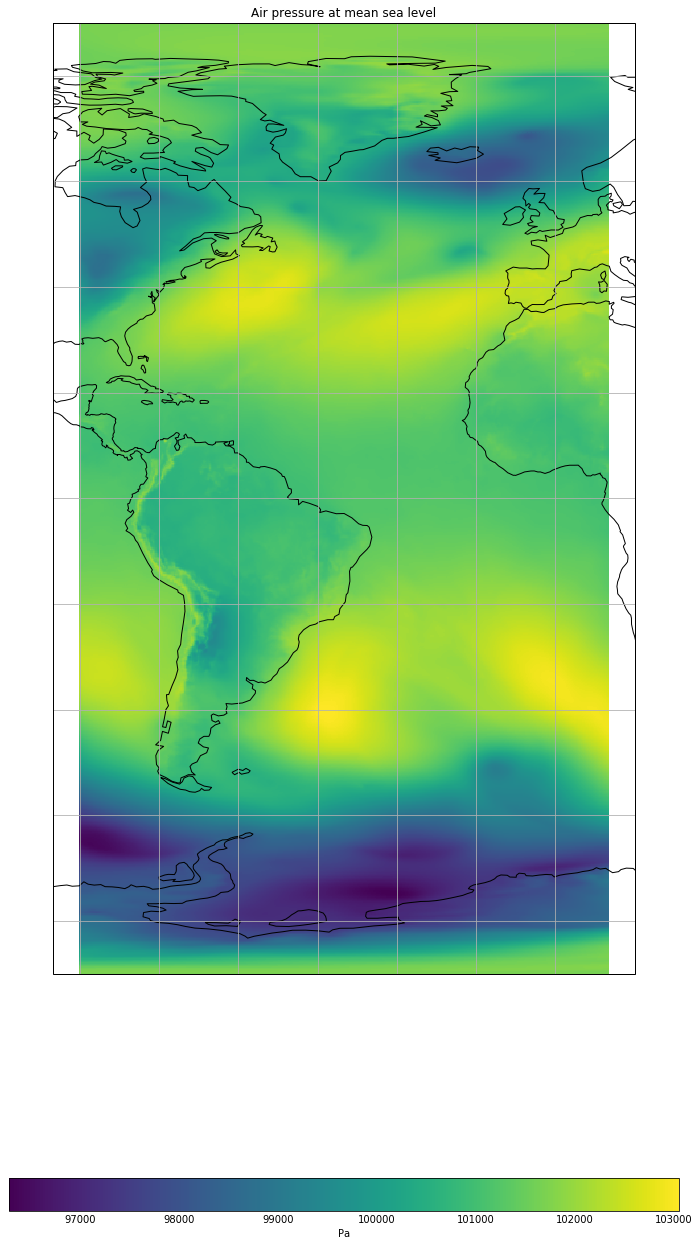

In [86]:
plt.figure(figsize=(12, 25))
qplt.pcolormesh(mslp_atl[0, ...])
plt.gca().coastlines()
plt.gca().gridlines()

In [78]:
u = iris.load_cube('20131101.nc', '10 metre U wind component')
u_atl = u.intersection(longitude=(-90, 10))
v = iris.load_cube('20131101.nc', '10 metre V wind component')
v_atl = v.intersection(longitude=(-90, 10))
print(u_atl)

10 metre U wind component / (m s**-1) (time: 1; latitude: 721; longitude: 401)
     Dimension coordinates:
          time                             x            -               -
          latitude                         -            x               -
          longitude                        -            -               x
     Attributes:
          Conventions: CF-1.6
          history: 2019-04-18 20:21:52 GMT by grib_to_netcdf-2.10.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf...


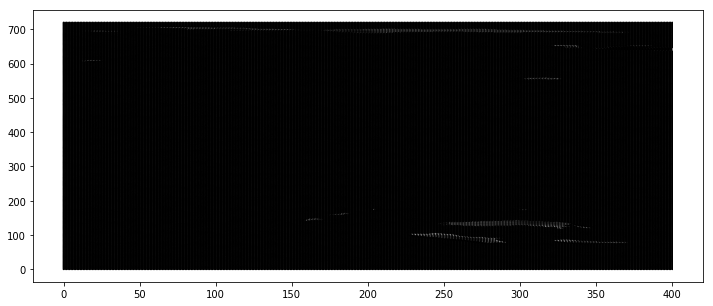

In [79]:
plt.figure(figsize=(12, 5))
# qplt.pcolormesh(mslp_atl[0, ...])
# transform = u.coord('longitude').coord_system.as_cartopy_projection()
plt.quiver(u_atl[0, ...].data, v_atl[0, ...].data)#, transform=transform)
# plt.gca().coastlines()
# plt.gca().gridlines()

In [80]:
wind_mag = (u_atl ** 2 + v_atl ** 2) ** 0.5
wind_mag.rename('windspeed')

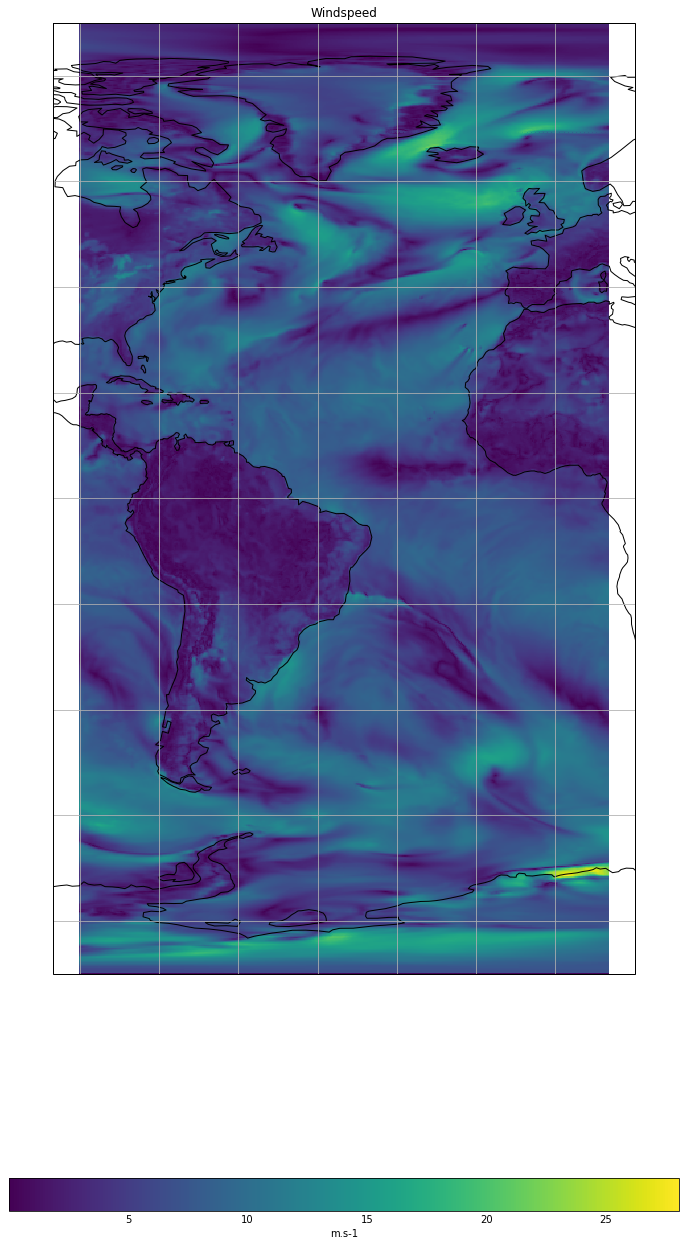

In [87]:
plt.figure(figsize=(12, 25))
qplt.pcolormesh(wind_mag[0, ...])
plt.gca().coastlines()
plt.gca().gridlines()